In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Load & prepare data
data = fetch_california_housing()
X, y = data.data, data.target

# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [3]:
# Model builder
def make_regressor(act_fn="relu", opt="adam"):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation=act_fn))
    model.add(layers.Dense(64, activation=act_fn))
    model.add(layers.Dense(1))   # linear by default
    
    model.compile(
        optimizer=opt,
        loss="mse",
        metrics=["mae"]
    )
    return model

In [4]:
# Train with Adam
net_adam = make_regressor(act_fn="relu", opt="adam")
hist_adam = net_adam.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.7649 - mae: 0.5977 - val_loss: 0.4377 - val_mae: 0.4699
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3864 - mae: 0.4437 - val_loss: 0.4113 - val_mae: 0.4500
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3692 - mae: 0.4256 - val_loss: 0.3756 - val_mae: 0.4280
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3452 - mae: 0.4128 - val_loss: 0.4354 - val_mae: 0.4311
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3347 - mae: 0.4035 - val_loss: 0.3445 - val_mae: 0.4004
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3283 - mae: 0.3960 - val_loss: 0.3462 - val_mae: 0.3963
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3117 - mae: 0.3884 - val_loss: 0.3570 - val_mae: 0.3989
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3054 - mae: 0.3819 - val_loss: 0.3340 - val_mae: 0.3971
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

In [5]:
# Train with SGD
net_sgd = make_regressor(act_fn="relu", opt="sgd")
hist_sgd = net_sgd.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.3625 - mae: 0.6508 - val_loss: 0.5197 - val_mae: 0.4857
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4254 - mae: 0.4602 - val_loss: 0.4584 - val_mae: 0.4605
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4205 - mae: 0.4454 - val_loss: 0.4069 - val_mae: 0.4448
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3613 - mae: 0.4270 - val_loss: 0.3823 - val_mae: 0.4401
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3502 - mae: 0.4196 - val_loss: 0.3708 - val_mae: 0.4296
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3429 - mae: 0.4151 - val_loss: 0.3826 - val_mae: 0.4383
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3363 - mae: 0.4104 - val_loss: 0.3662 - val_mae: 0.4186
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3318 - mae: 0.4063 - val_loss: 0.3549 - val_mae: 0.4149
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

In [6]:
# Evaluation helper
def regression_report(model, X, y):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, preds)
    return mse, rmse, mae

# Adam results
mse_tr, rmse_tr, mae_tr = regression_report(net_adam, X_train, y_train)
mse_val, rmse_val, mae_val = regression_report(net_adam, X_val, y_val)

print("Adam Optimizer Results")
print(f"Train -> MSE: {mse_tr:.3f}, RMSE: {rmse_tr:.3f}, MAE: {mae_tr:.3f}")
print(f"Val   -> MSE: {mse_val:.3f}, RMSE: {rmse_val:.3f}, MAE: {mae_val:.3f}")

# SGD results
mse_tr_sgd, rmse_tr_sgd, mae_tr_sgd = regression_report(net_sgd, X_train, y_train)
mse_val_sgd, rmse_val_sgd, mae_val_sgd = regression_report(net_sgd, X_val, y_val)

print("\nSGD Optimizer Results")
print(f"Train -> MSE: {mse_tr_sgd:.3f}, RMSE: {rmse_tr_sgd:.3f}, MAE: {mae_tr_sgd:.3f}")
print(f"Val   -> MSE: {mse_val_sgd:.3f}, RMSE: {rmse_val_sgd:.3f}, MAE: {mae_val_sgd:.3f}")


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Adam Optimizer Results
Train -> MSE: 0.321, RMSE: 0.567, MAE: 0.388
Val   -> MSE: 0.309, RMSE: 0.555, MAE: 0.394
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SGD Optimizer Results
Train -> MSE: 0.319, RMSE: 0.565, MAE: 0.394
Val   -> MSE: 0.333, RMSE: 0.577, MAE: 0.401


### **1. Relu vs Tanh in hidden layers**

**ReLU: Faster training, avoids vanishing gradients, widely used.**

**Tanh: Outputs between -1 and 1, may help when data is centered, but can saturate → slower convergence.**

**Usually, ReLU works better for deep regression models.**


### **2. Why linear output instead of sigmoid?**

**Sigmoid squashes values between 0–1, which is bad for regression because house prices can be much larger.**

**Linear activation lets the network predict any real number.**


### **3. Do deeper models always improve accuracy?**

**Not always. More layers = more parameters → higher risk of overfitting if dataset is small.**

**For California Housing (~20k samples), 2–3 hidden layers are usually enough.**


### **4. Metrics (MSE, MAE, RMSE)**

**MSE: Penalizes large errors more → sensitive to outliers.**

**MAE: Easy to interpret (average absolute error).**

**RMSE: Same units as target, intuitive for practitioners.**


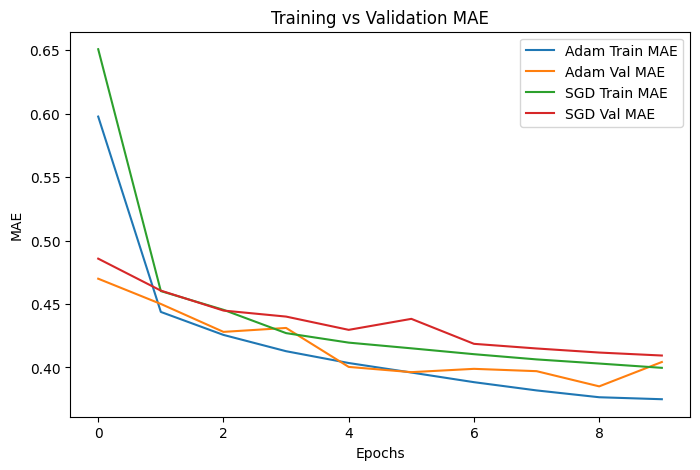

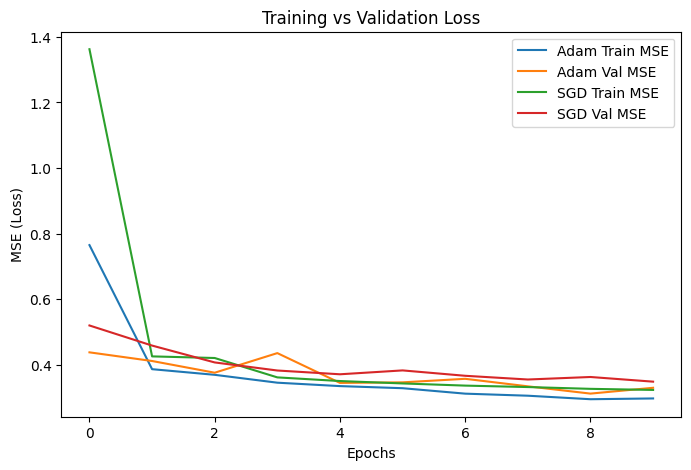

In [7]:
import matplotlib.pyplot as plt

# Plot MAE (Adam vs SGD)

plt.figure(figsize=(8,5))
plt.plot(hist_adam.history["mae"], label="Adam Train MAE")
plt.plot(hist_adam.history["val_mae"], label="Adam Val MAE")
plt.plot(hist_sgd.history["mae"], label="SGD Train MAE")
plt.plot(hist_sgd.history["val_mae"], label="SGD Val MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("Training vs Validation MAE")
plt.legend()
plt.show()


#  Plot Loss (MSE) (Adam vs SGD)

plt.figure(figsize=(8,5))
plt.plot(hist_adam.history["loss"], label="Adam Train MSE")
plt.plot(hist_adam.history["val_loss"], label="Adam Val MSE")
plt.plot(hist_sgd.history["loss"], label="SGD Train MSE")
plt.plot(hist_sgd.history["val_loss"], label="SGD Val MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE (Loss)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()
